In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)


# # from lab_utils_softmax import plt_softmax # type: ignore
# np.set_printoptions(precision=2)
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.activations import linear, relu, sigmoid
# %matplotlib widget
# import matplotlib.pyplot as plt
# plt.style.use('./deeplearning.mplstyle')

# import logging
# logging.getLogger("tensorflow").setLevel(logging.ERROR)
# tf.autograph.set_verbosity(0)

# from public_tests import * 

# from autils import *
# from lab_utils_softmax import plt_softmax
# np.set_printoptions(precision=2)

2024-05-08 12:43:27.090922: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
X = np.load('dataset_oldsim_2x100x500_crop9087_shuffled.npy')
train_data = X[:400,:1].transpose(0,2,3,1)
test_data = X[400:,:1].transpose(0,2,3,1)
labels = np.load('labels_dataset_oldsim_2x100x500_crop9087_shuffled.npy')
# reshaped_train_data = train_data.reshape(train_data.shape[0], -1)
# reshaped_test_data = test_data.reshape(test_data.shape[0], -1)



In [7]:
np.shape(train_data), np.shape(labels)

((400, 100, 500, 1), (400,))

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN architecture
def create_model(input_shape, num_classes):
    model = models.Sequential()
    
    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    
    # Flattening layer
    model.add(layers.Flatten())
    
    # Dense layers
    model.add(layers.Dense(128, activation='relu'))
    
    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))
    
    return model

# Set the input shape and number of classes
input_shape = (100, 500, 1)  # Input shape: height, width, channels (assuming grayscale images)
num_classes = 10  # Example number of classes

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 498, 32)       320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 49, 249, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 247, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 123, 64)      0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 181056)            0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [13]:
history = model.fit(train_data, labels, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, labels)
print('Test accuracy:', test_acc)

Epoch 1/10


2024-05-08 14:28:52.970187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-08 14:28:53.040675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


10/10 [==============================] - ETA: 0s - loss: 28.7538 - accuracy: 0.6406

2024-05-08 14:28:54.859016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 3s 193ms/step - loss: 28.7538 - accuracy: 0.6406 - val_loss: 77.9607 - val_accuracy: 0.7875
Epoch 2/10
10/10 [==============================] - 2s 167ms/step - loss: 48.5928 - accuracy: 0.8406 - val_loss: 105.9669 - val_accuracy: 0.8000
Epoch 3/10
10/10 [==============================] - 2s 166ms/step - loss: 74.5453 - accuracy: 0.7469 - val_loss: 78.4313 - val_accuracy: 0.8375
Epoch 4/10
10/10 [==============================] - 2s 161ms/step - loss: 41.5429 - accuracy: 0.8625 - val_loss: 113.6583 - val_accuracy: 0.7875
Epoch 5/10
10/10 [==============================] - 2s 164ms/step - loss: 22.5343 - accuracy: 0.6813 - val_loss: 126.2202 - val_accuracy: 0.8500
Epoch 6/10
10/10 [==============================] - 2s 167ms/step - loss: 94.4726 - accuracy: 0.8750 - val_loss: 281.8767 - val_accuracy: 0.8375
Epoch 7/10
10/10 [==============================] - 2s 158ms/step - loss: 92.0910 - accuracy: 0.8031 - val_loss: 159.5486 - val_accuracy: 0.800

ValueError: Data cardinality is ambiguous:
  x sizes: 8687
  y sizes: 400
Make sure all arrays contain the same number of samples.

In [10]:
# model.compile(
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#     optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
# )

history = model.fit(
    train_data, labels,
    epochs=40,
)

Epoch 1/40


2024-05-08 12:45:23.186525: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-05-08 12:45:23.263834: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


ValueError: Creating variables on a non-first call to a function decorated with tf.function.

In [58]:
train_data.shape, labels.shape

((400, 100, 500, 1), (400,))

1/1 [==============================] - 0s 22ms/step


2024-05-08 09:48:00.505127: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 26ms/step


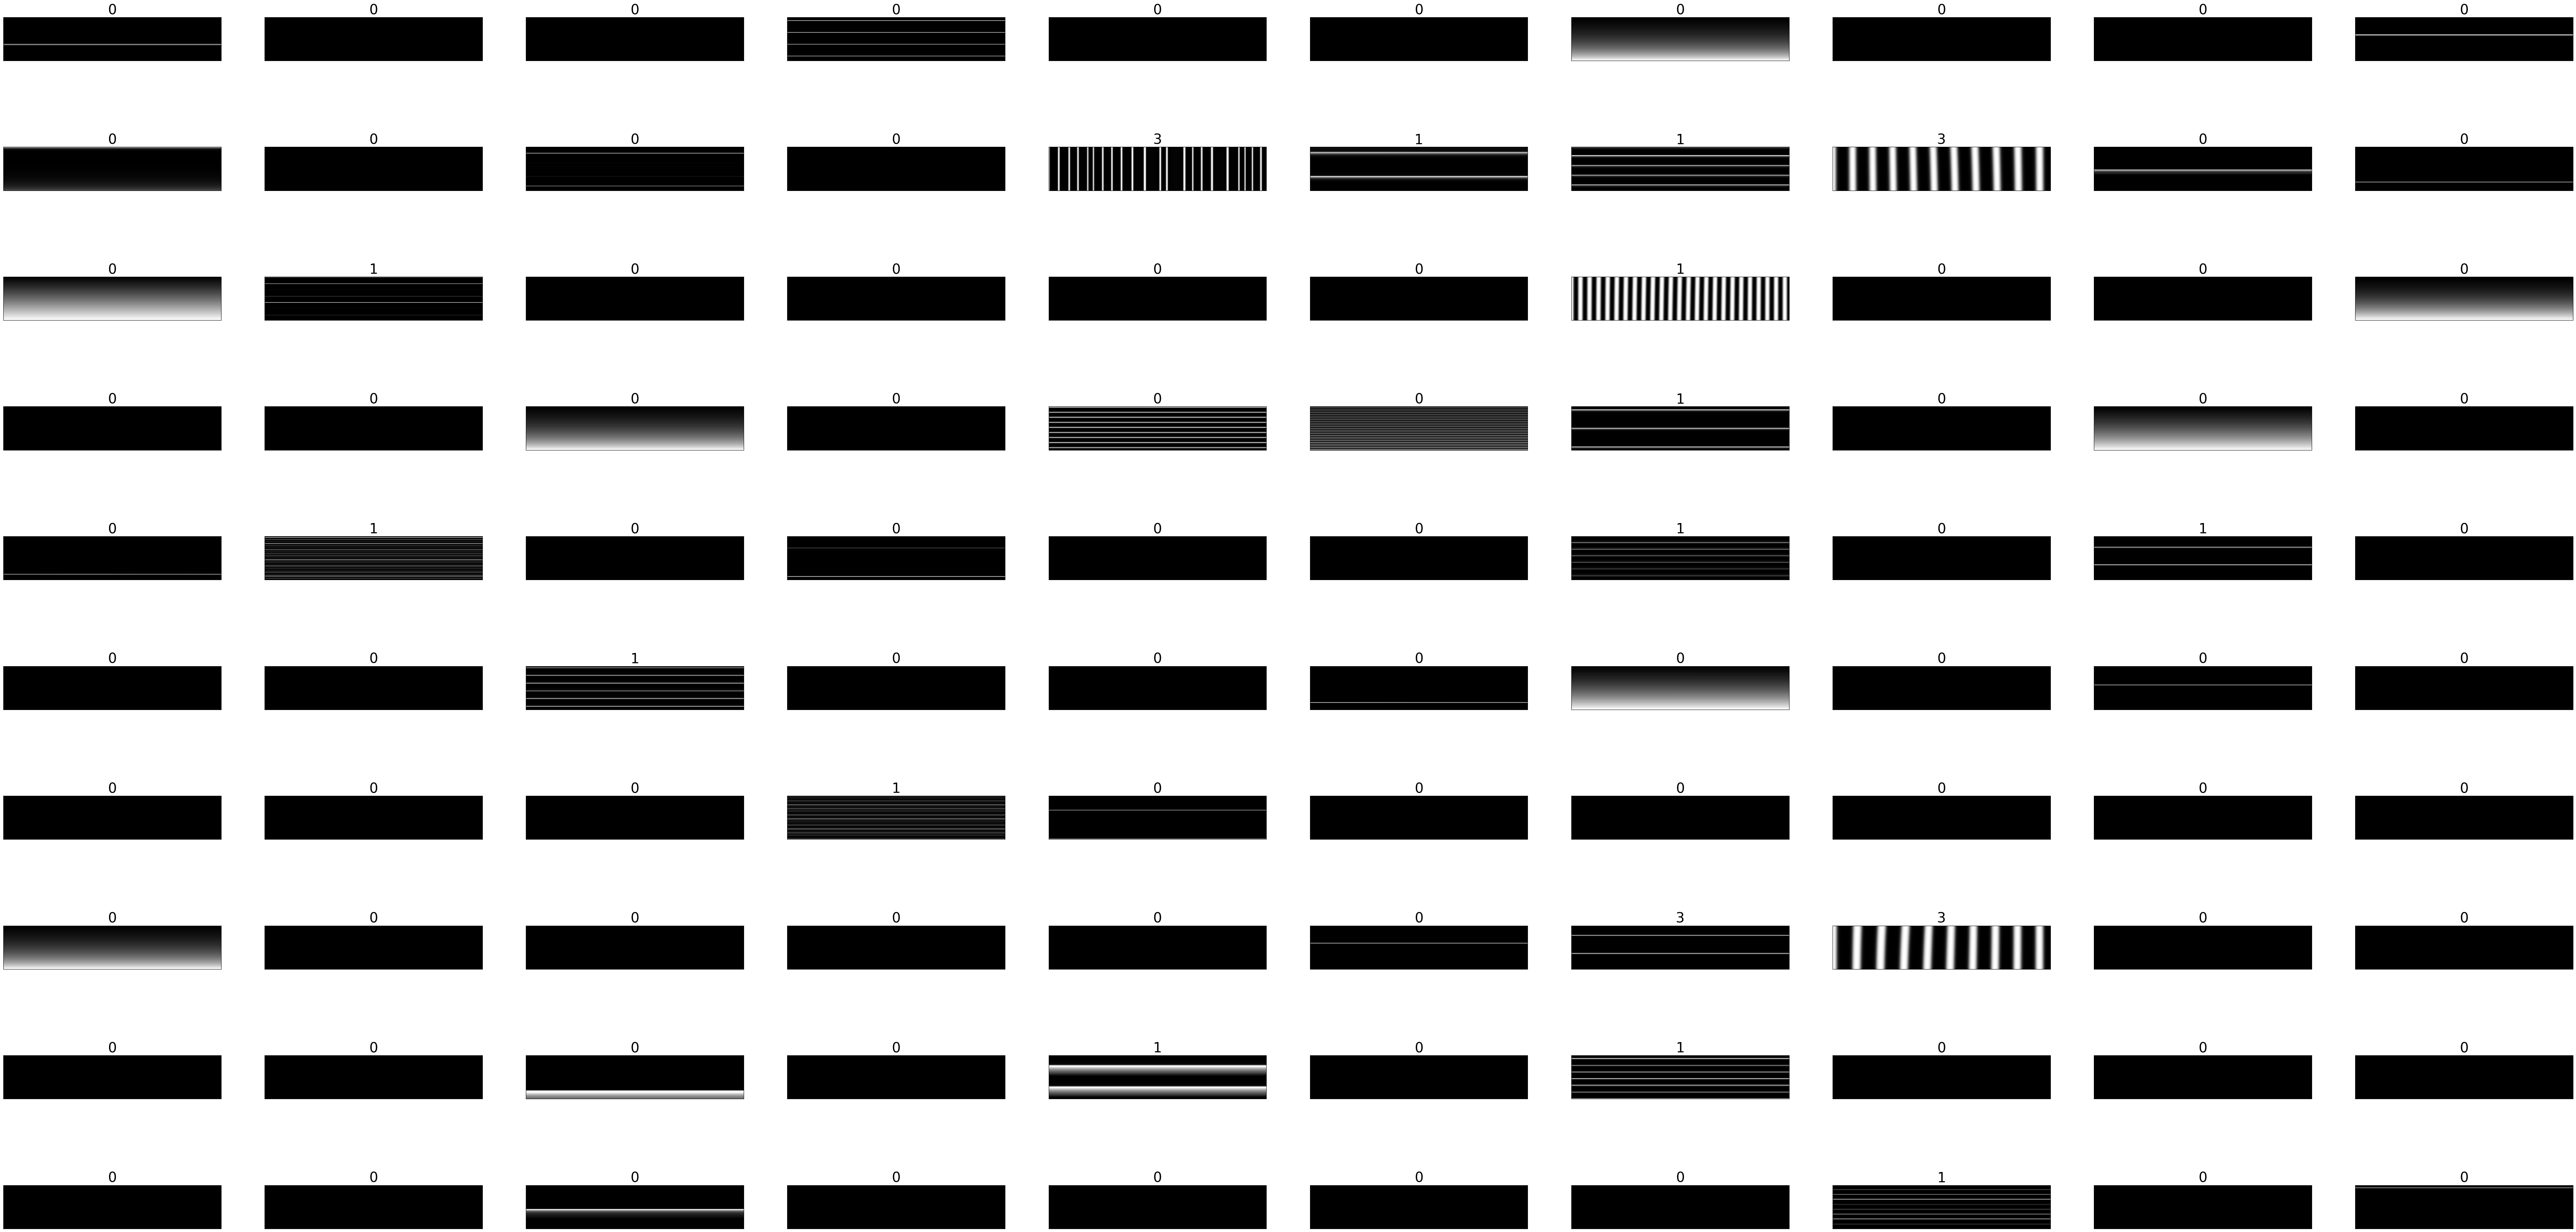

In [59]:

fig, axes = plt.subplots(10,10, figsize=(100,50))
# fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

    ax.imshow(train_data[i], cmap='gray')

    prediction = model.predict(reshaped_train_data[i].reshape(1,50000))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{yhat}", fontsize=30)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)




1/1 [==============================] - 0s 19ms/step


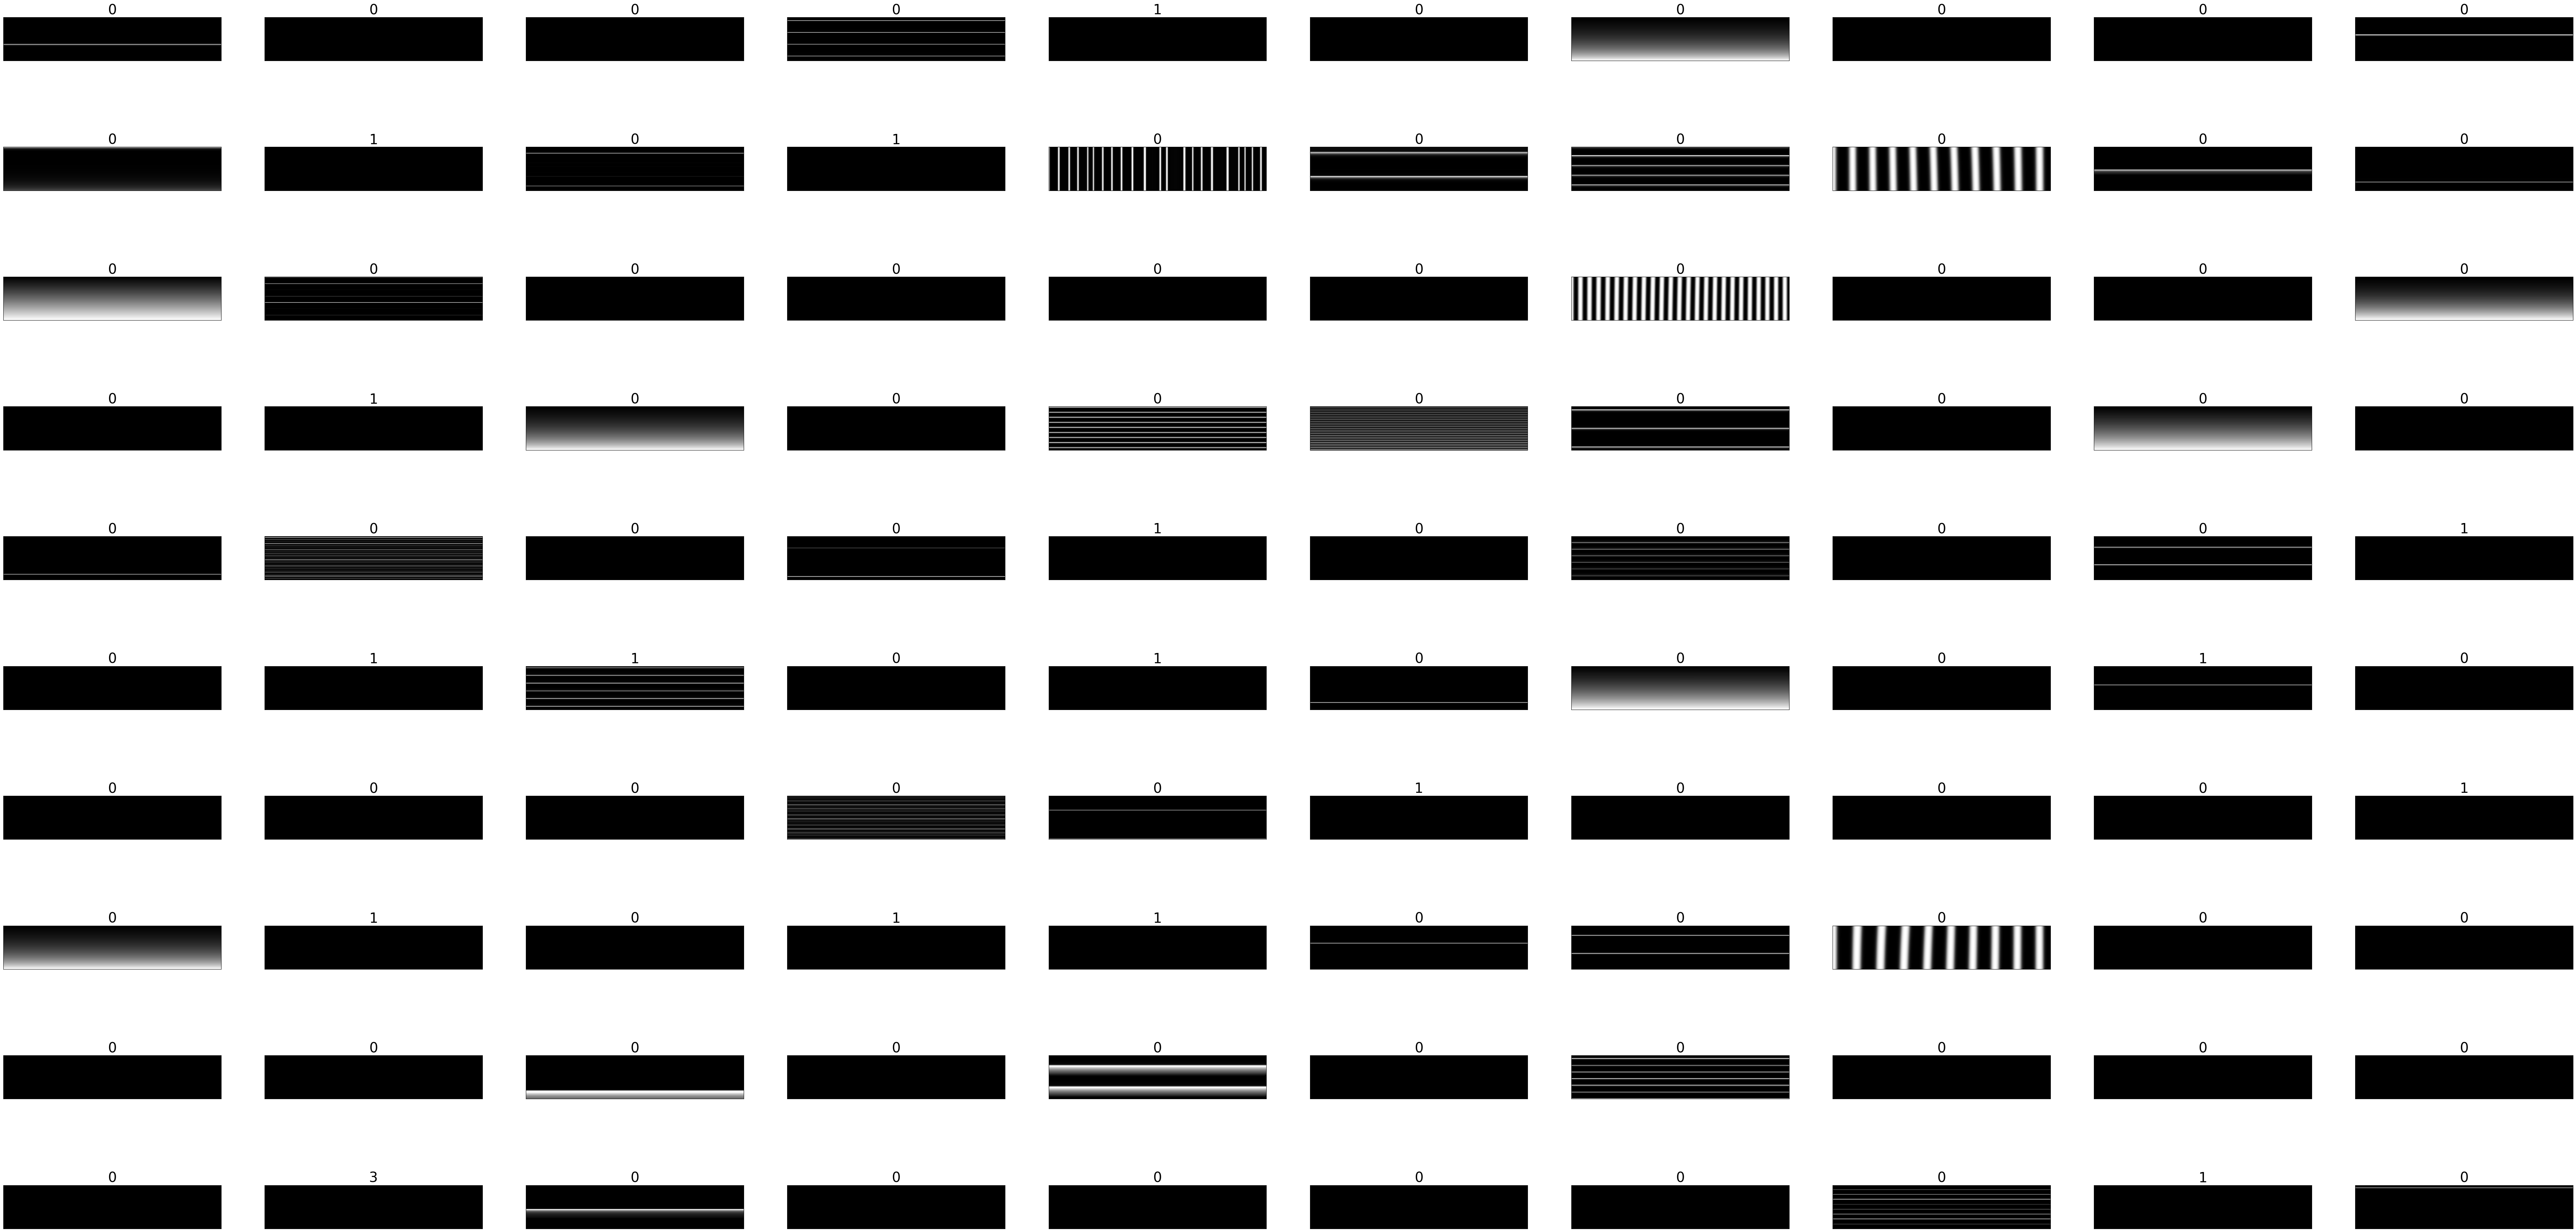

In [61]:

fig, axes = plt.subplots(10,10, figsize=(100,50))
# fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):

    ax.imshow(train_data[i], cmap='gray')

    prediction = model.predict(reshaped_test_data[i].reshape(1,50000))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    ax.set_title(f"{yhat}", fontsize=30)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


